## **STUDY CASE : A/B testing on adding an introduction page**



#Import Package

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Additional : Sample Size Calculation

In [2]:
effect_size = sms.proportion_effectsize(0.41, 0.43)

In [3]:
required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1
)

required_n = math.ceil(required_n)
print(required_n)

9559


Experiment Design:
*   Ho : Penambahan introductory page tidak secara signifikan mempengaruhi screening completion rate
*   H1 : Penambahan introductory page secara signifikan mempengaruhi screening completion rate
*   Significance level : 5%
*   Power : 80%
*   MDE : 5%







#Step 1 : Import Data

In [4]:
data = pd.read_csv("introductory_test.csv")
data.head()

,user_id,variant,last_7d_activation,exp_7d_activation
0,1,Control,0,0
1,2,Control,1,0
2,3,Control,1,0
3,4,Control,0,0
4,5,Control,0,0


#Step 2 : Calculate Activation Rate

In [5]:
grouped_data = data.groupby(["variant"]).agg(
    total_user = ('user_id', 'count'),
    last_7d_activation=('last_7d_activation', 'sum'),
    exp_7d_activation=('exp_7d_activation', sum)
)

grouped_data['last7d_cvr'] = grouped_data['last_7d_activation']/grouped_data['total_user']
grouped_data['exp7d_cvr'] = grouped_data['exp_7d_activation']/grouped_data['total_user']
grouped_data=grouped_data[["total_user", "last7d_cvr", "exp7d_cvr"]]

grouped_data

,total_user,last7d_cvr,exp7d_cvr
variant,,,
Control,15000,0.460667,0.413000
Treatment,15000,0.463267,0.451133


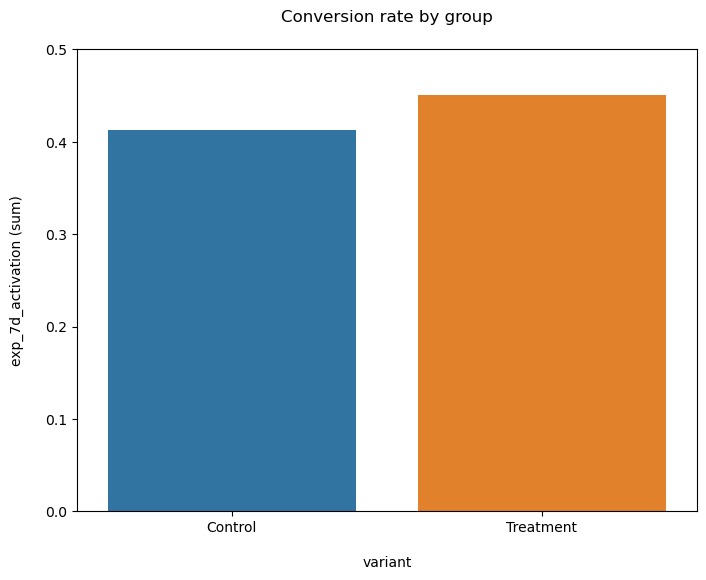

In [6]:
plt.figure(figsize=(8,6));
sns.barplot(x=data["variant"], y=data["exp_7d_activation"], ci=False);


plt.ylim(0, 0.5);
plt.title("Conversion rate by group", pad=20);
plt.xlabel("variant", labelpad=15);
plt.ylabel("exp_7d_activation (sum)", labelpad=15);

#Hypothesis Testing (C-Square)

In [7]:
from scipy.stats.distributions import chi2
contigency = pd.crosstab(data["variant"], data["exp_7d_activation"])

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)

print(p)

2.8320088604280797e-11


#Summary

*   Conversion rate from treatment group (46%) > control group (41%) or an increase of 13%
*   From the results of the chi-square statistical test, it is known that the p-value is 2.8e-11 or smaller than the significance level of 5%
*   From the results of the statistical test above, we can reject the null hypothesis, which means that the new introduction page has an influence on the screening completion rate



